In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import KFold,cross_val_score,learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,auc,roc_auc_score
import pickle as pk
import warnings
warnings.filterwarnings('ignore')

In [2]:
# function to read the dataset
def read_dataset(file):
    return pd.read_csv(file)

In [3]:
data = read_dataset('cleaned_data.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# convert categorical data to numerical
mapping = {'Dropout':0,'Graduate':2,'Enrolled':1}

data['Target'] = data['Target'].map(mapping)

In [5]:
# split data into features and target

X = data.drop(columns=['Target'],axis=1)
y=data['Target']

In [6]:
X.shape, y.shape

((4424, 36), (4424,))

In [7]:
#split into train test and validation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8, random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.3,random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [9]:
# function to evaluate our model performance
def evaluate(X,y,model,subset=''):
    y_pred = model.predict(X)
    
    print(f'{subset} Accuracy score {accuracy_score(y,y_pred)}')
    print(f'{subset} f1_score {f1_score(y,y_pred,average="macro")}')
    print(f'{subset} precision_score {precision_score(y,y_pred,average="macro")}')
    print(f'{subset} recall_score {recall_score(y,y_pred,average="macro")}\n')
    
    

In [10]:
modells = {'LogisticRegression':LogisticRegression(),
         'DecisionTree':DecisionTreeClassifier(),
         'RandomForest':RandomForestClassifier(),
         'support vector machine':SVC(),
         'Xgboost':XGBClassifier()}
def all_models(X,y,subset=''):
    
    for name,model in modells.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X)
        print(f'{subset} {name} Accuracy score {accuracy_score(y,y_pred)}')
        print(f'{subset} {name} f1_score {f1_score(y,y_pred,average="macro")}')
        print(f'{subset} {name} precision_score {precision_score(y,y_pred,average="macro")}')
        print(f'{subset} {name} recall_score {recall_score(y,y_pred,average="macro")}\n')
    

In [11]:

all_models(X_train,y_train,'Training')

Training LogisticRegression Accuracy score 0.8110859728506787
Training LogisticRegression f1_score 0.7153828599777402
Training LogisticRegression precision_score 0.7647121369772943
Training LogisticRegression recall_score 0.7045779796763604

Training DecisionTree Accuracy score 1.0
Training DecisionTree f1_score 1.0
Training DecisionTree precision_score 1.0
Training DecisionTree recall_score 1.0

Training RandomForest Accuracy score 1.0
Training RandomForest f1_score 1.0
Training RandomForest precision_score 1.0
Training RandomForest recall_score 1.0

Training support vector machine Accuracy score 0.8359728506787331
Training support vector machine f1_score 0.7530273871708975
Training support vector machine precision_score 0.84312820359332
Training support vector machine recall_score 0.7307748438541584

Training Xgboost Accuracy score 1.0
Training Xgboost f1_score 1.0
Training Xgboost precision_score 1.0
Training Xgboost recall_score 1.0



In [12]:
all_models(X_test,y_test,'Test')

Test LogisticRegression Accuracy score 0.7631154156577885
Test LogisticRegression f1_score 0.6736870814775603
Test LogisticRegression precision_score 0.6990552755265044
Test LogisticRegression recall_score 0.6668530561266456

Test DecisionTree Accuracy score 0.6517352703793382
Test DecisionTree f1_score 0.5839760964155277
Test DecisionTree precision_score 0.5843932652520135
Test DecisionTree recall_score 0.583947995274838

Test RandomForest Accuracy score 0.7590799031476998
Test RandomForest f1_score 0.6582598472578675
Test RandomForest precision_score 0.6971335881482849
Test RandomForest recall_score 0.6534458228350095

Test support vector machine Accuracy score 0.7397094430992736
Test support vector machine f1_score 0.6171985769628531
Test support vector machine precision_score 0.6852293178622012
Test support vector machine recall_score 0.6157491261612918

Test Xgboost Accuracy score 0.7497982243744956
Test Xgboost f1_score 0.663157530852028
Test Xgboost precision_score 0.68141880608

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_performance(model_names, accuracy_scores, f1_scores, precision_scores, recall_scores, roc_auc_scores):
    metrics = {
        'Accuracy': accuracy_scores,
        'F1 Score': f1_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'ROC-AUC': roc_auc_scores
    }
    
    # Setting up the plots
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))
    fig.suptitle('Model Performance Metrics', fontsize=20)

    # Metric Titles
    metric_titles = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC-AUC']

    # Plot each metric in its respective subplot
    for i, (metric, scores) in enumerate(metrics.items()):
        row, col = divmod(i, 2)
        axes[row, col].bar(model_names, scores, color='b')
        axes[row, col].set_title(metric_titles[i])
        axes[row, col].set_ylabel('Score')
        axes[row, col].set_xlabel('Models')
        axes[row, col].set_xticklabels(model_names, rotation=45, ha='right')
        # Adding value annotations
        for idx, score in enumerate(scores):
            axes[row, col].text(idx, score + 0.01, f'{score:.2f}', ha='center')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('comparison.jpg')
    plt.show()

# Example of usage with mock data (replace with actual data from report)
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost', 'Neural Net']
accuracy_scores = [0.76, 0.65, 0.75, 0.73, 0.74, 0.712]
f1_scores = [0.583, 0.583, 0.658, 0.617, 0.663, 0.63]
precision_scores = [0.699, 0.584, 0.697, 0.685, 0.68, 0.665]
recall_scores = [0.666, 0.583, 0.653, 0.615, 0.656, 0.632]
roc_auc_scores = [0.8199, 0.7496, 0.9035, 0.7531, 0.9039, 0.795]




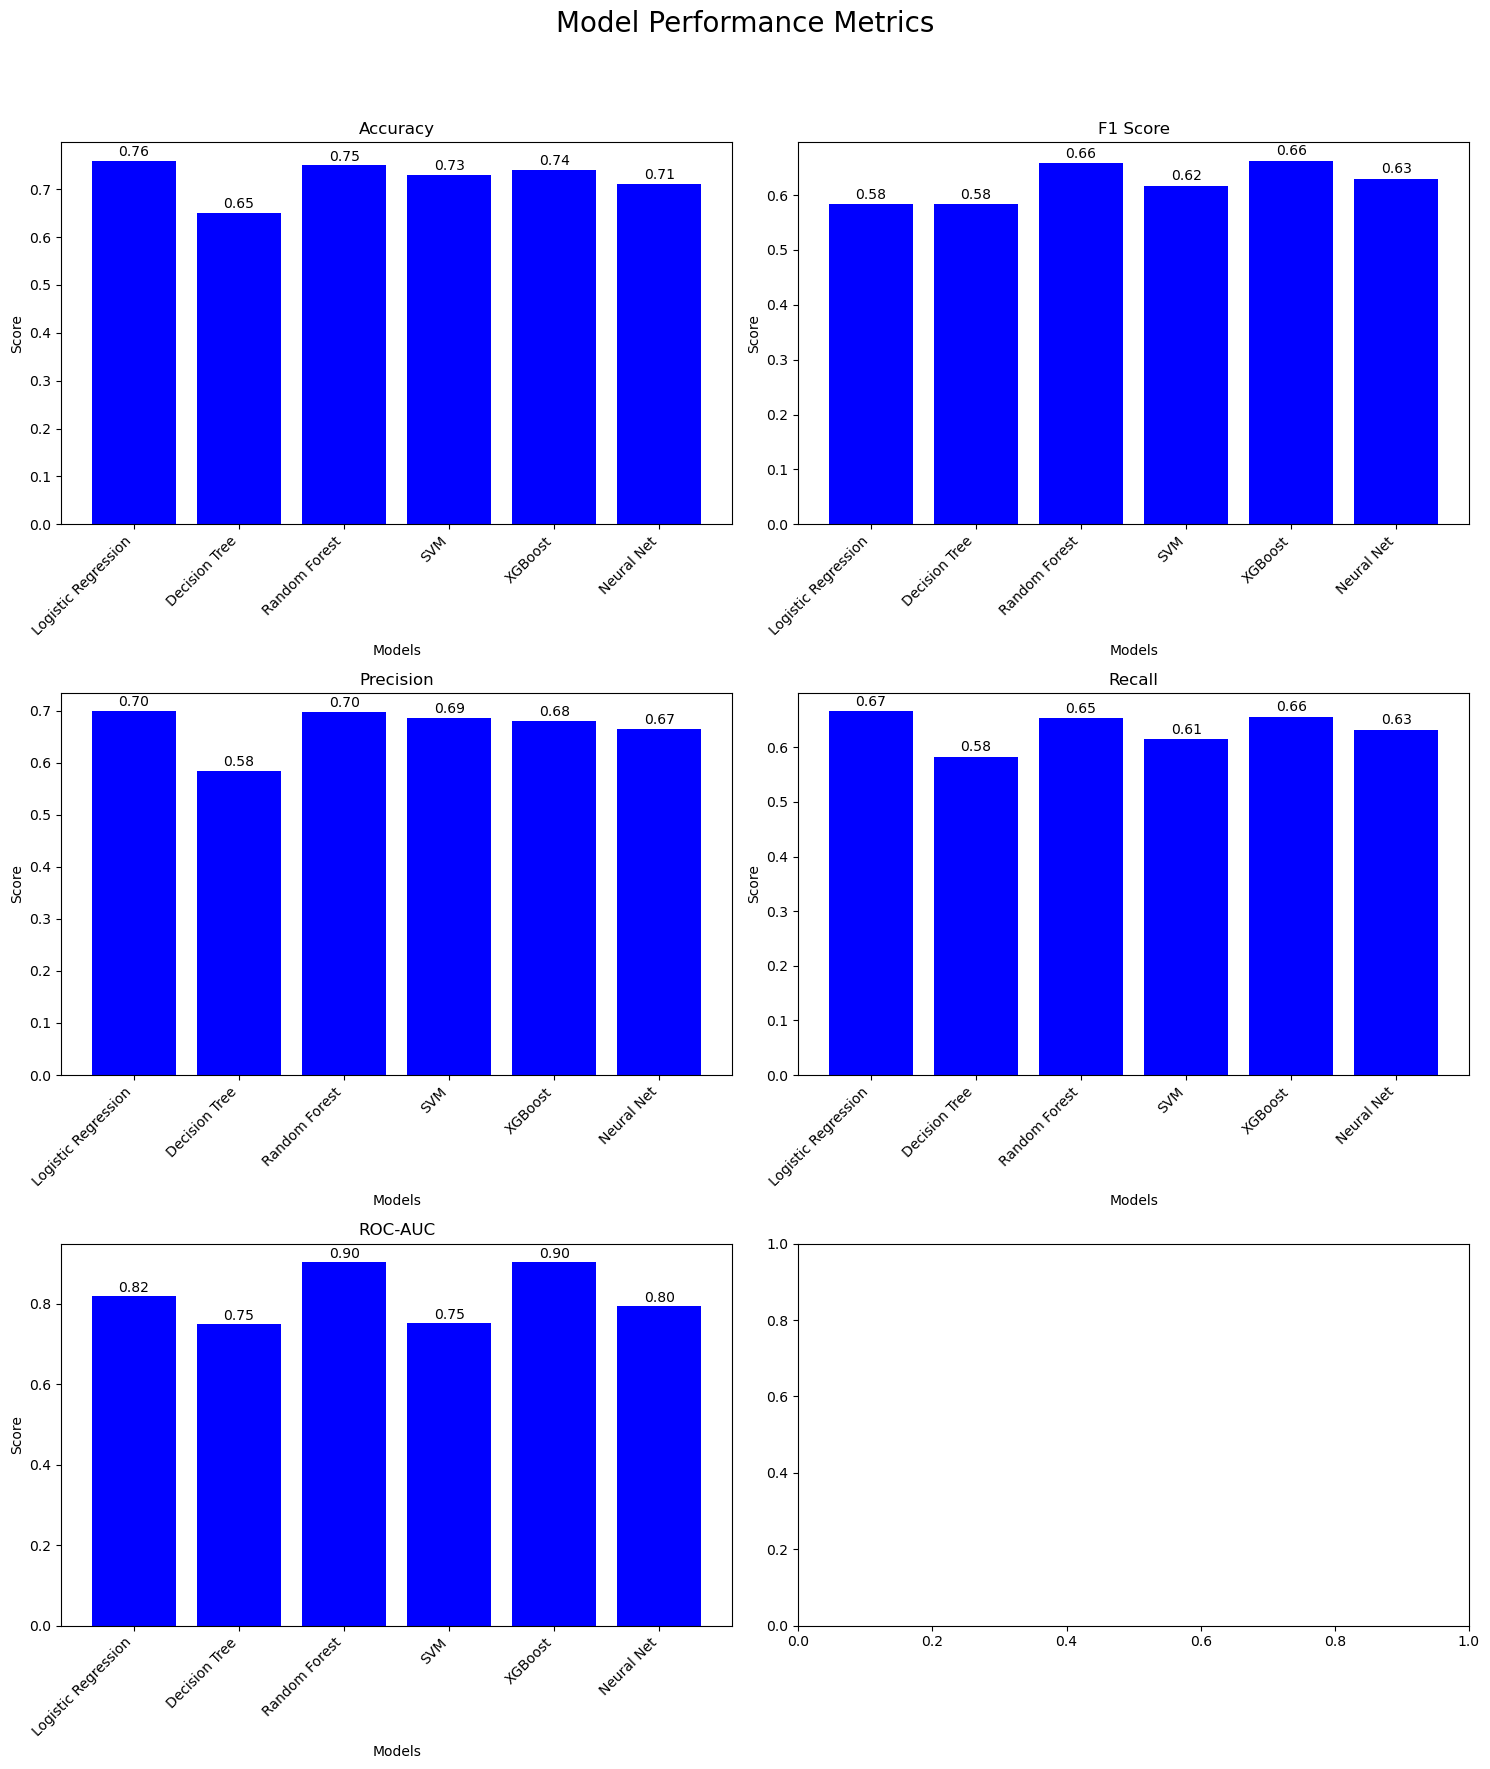

In [70]:
visualize_performance(model_names, accuracy_scores, f1_scores, precision_scores, recall_scores, roc_auc_scores)

# Neural Network

In [13]:
# define the model
model = models.Sequential([layers.InputLayer(input_shape=(X_train.shape[1],)),
                          layers.Dense(128,activation='relu'),
                          layers.Dense(64,activation='relu'),
                          layers.Dense(3,activation='softmax')])



In [14]:
# compile the model

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.2,batch_size=32)

Epoch 1/50
23/23 [==============================] - 2s 24ms/step - loss: 0.9397 - accuracy: 0.6054 - val_loss: 0.8822 - val_accuracy: 0.7062
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6880 - accuracy: 0.7341 - val_loss: 0.7437 - val_accuracy: 0.7232
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5958 - accuracy: 0.7694 - val_loss: 0.7108 - val_accuracy: 0.7232
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7977 - val_loss: 0.6814 - val_accuracy: 0.7458
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5096 - accuracy: 0.8161 - val_loss: 0.7042 - val_accuracy: 0.7401
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4816 - accuracy: 0.8246 - val_loss: 0.6841 - val_accuracy: 0.7345
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4595 - accuracy: 0.8388 - val_loss: 0.6930 - val_accuracy: 0.7571
Epoch 8/50
23/23 [=

In [16]:
# Evaluate the model
test_loss,test_acc = model.evaluate(X_test,y_test)

78/78 [==============================] - 0s 4ms/step - loss: 1.1838 - accuracy: 0.7195


In [19]:
def plot_history(history):
    return pd.DataFrame(history.history).plot(figsize=(10,7))

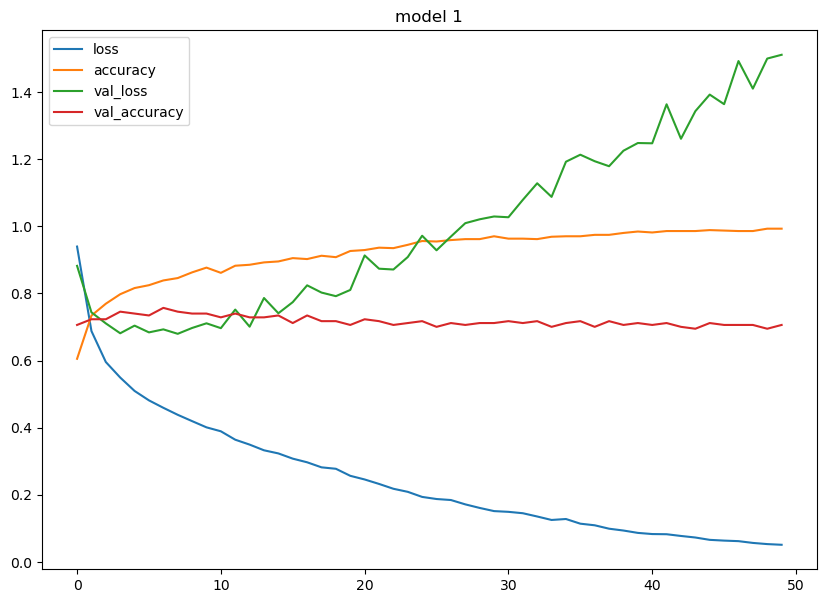

In [50]:
plot_history(history)
plt.title('model 1')
plt.savefig('model_1.jpg')

The accuracy score is 0.99 and val_accuracy is 0.706, the gap between the two is indication that the model is overfitting

In [21]:
test_loss,test_acc

(1.1838430166244507, 0.7195318937301636)

the test loss is 1.18 and test-acc is 0.719 this indicates that the model is not performing very poorly, the model can be improved.

### add dropout layer to the model to reduce overfitting

In [22]:
model_2 = models.Sequential([layers.InputLayer(input_shape=(X_train.shape[1],)),
                            layers.Dense(128,activation='relu'),
                            layers.Dropout(0.5),
                            layers.Dense(64,activation='relu'),
                            layers.Dropout(0.5),
                            layers.Dense(3,activation='softmax')])

In [23]:
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [24]:
history_2 = model_2.fit(X_train,y_train,epochs=50,validation_split=0.2,batch_size=32)

Epoch 1/50
23/23 [==============================] - 2s 31ms/step - loss: 1.1305 - accuracy: 0.5092 - val_loss: 0.9519 - val_accuracy: 0.6497
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.9364 - accuracy: 0.6011 - val_loss: 0.8641 - val_accuracy: 0.6780
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.8537 - accuracy: 0.6450 - val_loss: 0.8071 - val_accuracy: 0.6780
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.8002 - accuracy: 0.6860 - val_loss: 0.7641 - val_accuracy: 0.7006
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.7809 - accuracy: 0.6846 - val_loss: 0.7303 - val_accuracy: 0.7062
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.7774 - accuracy: 0.7058 - val_loss: 0.7070 - val_accuracy: 0.7119
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.7424 - accuracy: 0.7086 - val_loss: 0.6854 - val_accuracy: 0.7232
Epoch 8/50
23/23 [=

In [25]:
test_loss,test_acc = model_2.evaluate(X_test,y_test)

78/78 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.7522


The gap between the accuracy and val_accuracy has reduce indicating a reduction in overfitting
the test loss has reduce significantly indicating a improvemnent in  of the model

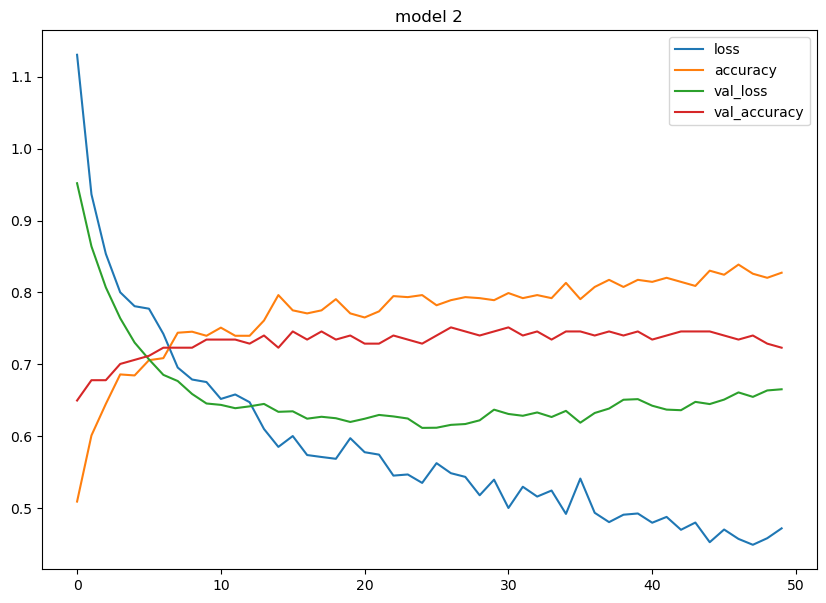

In [51]:
plot_history(history_2)
plt.title('model 2')
plt.savefig('model_2.jpg')

### reducing the number of neurons in each layer and increase the number of layers and reduce the dropout rate

In [27]:
model3 = models.Sequential([layers.InputLayer(input_shape=(X_train.shape[1],)),
                           layers.Dense(64,activation='relu'),
                           layers.Dropout(0.3),
                           layers.Dense(32,activation='relu'),
                           layers.Dropout(0.3),
                           layers.Dense(8,activation='relu'),
                           layers.Dropout(0.3),
                           layers.Dense(3,activation='softmax')])



In [28]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history3 = model3.fit(X_train,y_train,validation_split=0.2,epochs=50,batch_size=32)

Epoch 1/50
23/23 [==============================] - 2s 21ms/step - loss: 1.0914 - accuracy: 0.4371 - val_loss: 1.0690 - val_accuracy: 0.5198
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 1.0308 - accuracy: 0.4965 - val_loss: 1.0301 - val_accuracy: 0.5367
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.9919 - accuracy: 0.5106 - val_loss: 0.9936 - val_accuracy: 0.5706
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.9463 - accuracy: 0.5870 - val_loss: 0.9595 - val_accuracy: 0.6215
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.9495 - accuracy: 0.5545 - val_loss: 0.9250 - val_accuracy: 0.6723
Epoch 6/50
23/23 [==============================] - 0s 11ms/step - loss: 0.8929 - accuracy: 0.5941 - val_loss: 0.8877 - val_accuracy: 0.7006
Epoch 7/50
23/23 [==============================] - 0s 10ms/step - loss: 0.8988 - accuracy: 0.5813 - val_loss: 0.8651 - val_accuracy: 0.7006
Epoch 8/50
23/23 

In [29]:
test_loss,test_acc = model3.evaluate(X_test,y_test)

78/78 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.7405


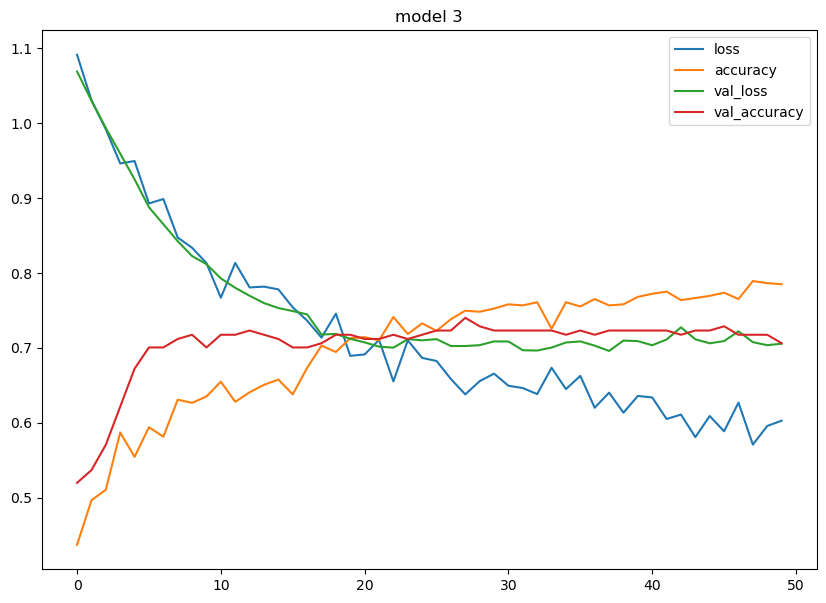

In [52]:
plot_history(history3)
plt.title('model 3')
plt.savefig('model_3.jpg')

The narrow gap between the accuracy and val_accuracy show great improvement the level of overfitting has greatly reduced


In [31]:
model4 = models.Sequential([layers.InputLayer(input_shape=(X_train.shape[1],)),
                           layers.Dense(128,activation = 'relu'),
                           layers.Dense(64,activation='relu'),
                           layers.Dense(32,activation='relu'),
                           layers.Dense(8,activation='relu'),
                           layers.Dense(3, activation='softmax')])

model4.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history4 = model4.fit(X_train,y_train,epochs=50,validation_split=0.2, batch_size=32)

Epoch 1/50
23/23 [==============================] - 1s 22ms/step - loss: 0.9626 - accuracy: 0.5516 - val_loss: 0.9001 - val_accuracy: 0.6610
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.7407 - accuracy: 0.7214 - val_loss: 0.7697 - val_accuracy: 0.7062
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6258 - accuracy: 0.7595 - val_loss: 0.7080 - val_accuracy: 0.7062
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5666 - accuracy: 0.7808 - val_loss: 0.6616 - val_accuracy: 0.7062
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5270 - accuracy: 0.7935 - val_loss: 0.6791 - val_accuracy: 0.7119
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5024 - accuracy: 0.8020 - val_loss: 0.6762 - val_accuracy: 0.7119
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4749 - accuracy: 0.8119 - val_loss: 0.6533 - val_accuracy: 0.7062
Epoch 8/50
23/23 [=

In [64]:
loss,acc = model4.evaluate(X_test,y_test)

78/78 [==============================] - 1s 7ms/step - loss: 1.9841 - accuracy: 0.7260


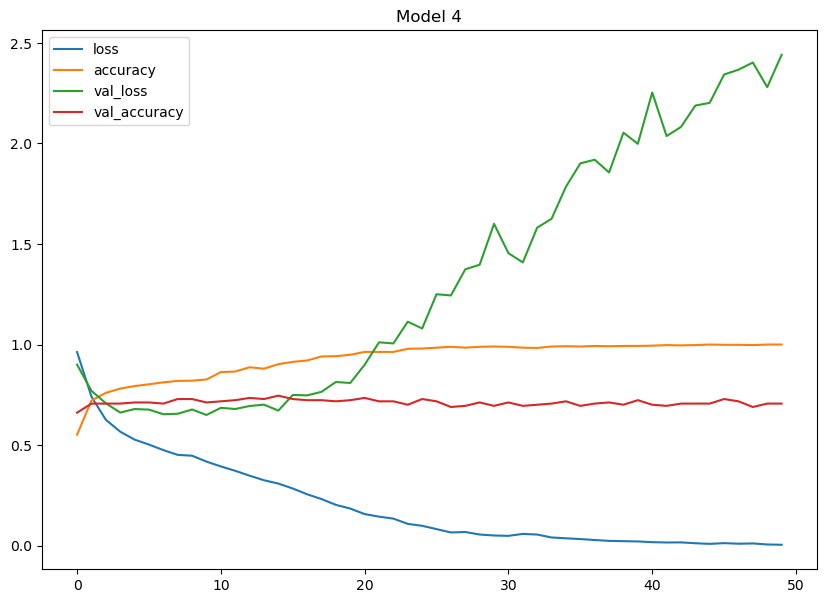

In [53]:
plot_history(history4)
plt.title('Model 4')
plt.savefig('model_4.jpg')

In [33]:
model5 = models.Sequential([layers.InputLayer(input_shape=(X_train.shape[1],)),
                           layers.Dense(64,activation='relu'),
                           layers.Dropout(0.3),
                           layers.Dense(32,activation='relu'),
                           layers.Dropout(0.3),
                           layers.Dense(8,activation='relu'),
                           layers.Dropout(0.3),
                           layers.Dense(3, activation='softmax')])

model5.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history5 = model5.fit(X_train,y_train,epochs=50,validation_split=0.2, batch_size=32)

Epoch 1/50
23/23 [==============================] - 2s 23ms/step - loss: 1.0982 - accuracy: 0.4300 - val_loss: 1.0148 - val_accuracy: 0.5593
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 1.0426 - accuracy: 0.5290 - val_loss: 0.9744 - val_accuracy: 0.5819
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.9616 - accuracy: 0.5827 - val_loss: 0.9409 - val_accuracy: 0.6497
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.9264 - accuracy: 0.6238 - val_loss: 0.9018 - val_accuracy: 0.6441
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.8882 - accuracy: 0.6436 - val_loss: 0.8634 - val_accuracy: 0.6723
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.8520 - accuracy: 0.6662 - val_loss: 0.8158 - val_accuracy: 0.6836
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.7902 - accuracy: 0.6860 - val_loss: 0.7806 - val_accuracy: 0.6836
Epoch 8/50
23/23 [=

In [65]:
loss,acc = model5.evaluate(X_test,y_test)

78/78 [==============================] - 1s 6ms/step - loss: 0.6571 - accuracy: 0.7474


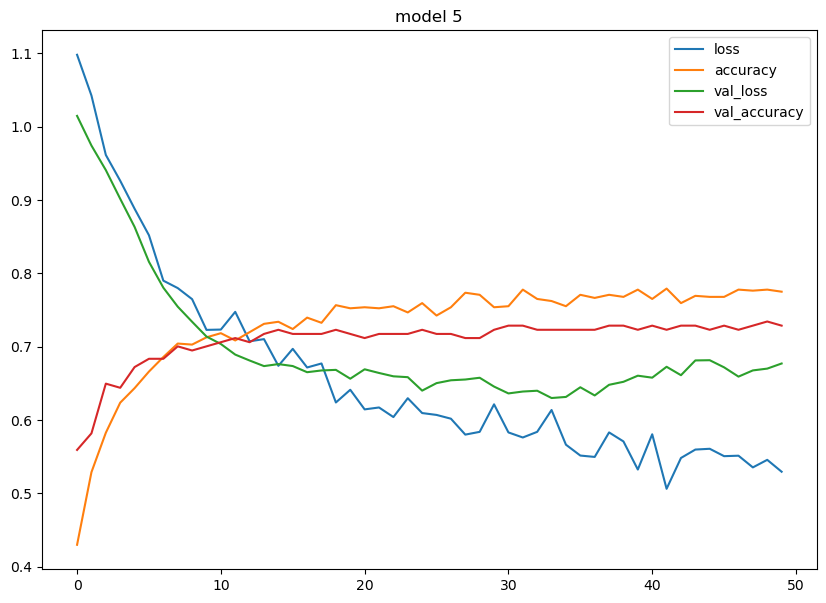

In [54]:
plot_history(history5)
plt.title('model 5')
plt.savefig('model_5.jpg')

# cross validation

In [59]:
class ModelEvaluator:
    def __init__(self,X,y,n_splits=5):
        self.X=X
        self.y=y
        self.n_splits = n_splits
        self.kf = KFold(n_splits=n_splits)
        self.models = {
            'Logistic Regression': LogisticRegression(),
            'Decision Tree': DecisionTreeClassifier(),
            'Random Forest': RandomForestClassifier(),
            'Support Vector Machine': SVC(probability=True),
            'XGBoost': XGBClassifier(objective='multi:softprob')
        }
        self.metrics_results = {}
        self.all_y_proba = []
        
    def cross_validation(self):
        for name,model in self.models.items():
            all_accuracies=[]
            all_precisions = []
            all_recalls = []
            all_f1_scores = []
            all_roc_aucs = []
    
            # Store all predicted probabilities for ROC
            for train_index, val_index in self.kf.split(self.X):
                X_train,X_val = self.X.iloc[train_index],self.X.iloc[val_index]
                y_train,y_val = self.y.iloc[train_index],self.y.iloc[val_index]
                model.fit(X_train,y_train)
                # save the model
                with open(f'{name}.pk1','wb') as file:
                    pk.dump(model,file)
                    
                y_pred=model.predict(X_val)
                y_pred_prob = model.predict_proba(X_val)
    
                # Store predicted probabilities for ROC AUC visualization
                self.all_y_proba.append(y_pred_prob)
    
                # metrics
                accuracy = accuracy_score(y_val, y_pred)
                precision = precision_score(y_val, y_pred, average='weighted')
                recall = recall_score(y_val, y_pred, average='weighted')
                f1 = f1_score(y_val, y_pred, average='weighted')
                roc_auc = roc_auc_score(y_val,y_pred_prob,multi_class='ovr',average = 'weighted')
                # append the metrics for each fold
                all_accuracies.append(accuracy)
                all_precisions.append(precision)
                all_recalls.append(recall)
                all_f1_scores.append(f1)
                all_roc_aucs.append(roc_auc)
                
                # compute the average metrics
                avg_metrics={
                'Precision':np.mean(all_precisions),
                'Recall':np.mean(all_recalls),
                'F1_score':np.mean(all_f1_scores),
                'Accuracy':np.mean(all_accuracies),
                'ROC-AUC':np.mean(all_roc_aucs)
                }

                self.metrics_results[name]=avg_metrics
            
            print(f"Model: {name}")
            for metric, value in avg_metrics.items():
                print(f"  Average {metric}: {value:.4f}")
            print("-" * 40)

    def plot_roc_curves(self):
        n_classes = len(self.y.unique()) # determine the number of classes
        y_true_bin = label_binarize(self.y,classes=[i for i in range(n_classes)])
        plt.figure(figsize=(10,9))
        
        fpr = dict()
        tpr = dict()
        roc_auc=()

        for i in range(n_classes):
            # Concatenate all predicted probabilities from different folds
            y_score = np.concatenate([proba[:,i] for proba in self.all_y_proba])
            y_test = np.concatenate([y_true_bin[val_index,i] for _,val_index in self.kf.split(self.X)])

            fpr[i],tpr[i],_=roc_curve(y_test,y_score) 
            roc_auc[i]=auc(fpr[i],tpr[i])

        plt.plot([0,1],[0,1],'kw--',lw=2,label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves for Multiclass Classification')
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()

    def learningCurve(self):
        n_models = len(self.models)
        fig,ax=plt.subplots(n_models,1,figsize=(10,5*n_models))

        if n_models==1:
            ax=[ax]
        
        styles = ['-', '--', '-.', ':']
        markers = ['o', 's', 'D', 'v']
        colors = ['r', 'g', 'b', 'c', 'm']
        for idx,(name,model) in enumerate(self.models.items()):
            train_sizes,train_scores,test_scores = learning_curve(model,self.X,self.y,n_jobs=-1,train_sizes=np.linspace(0.1,1.0,10),
                                                                 cv=self.kf)
            train_scores_mean = np.mean(train_scores, axis=1)
            test_scores_mean = np.mean(test_scores, axis=1)

            ax[idx].plot(train_sizes, train_scores_mean,marker=markers[idx % len(markers)],linestyle = styles[idx % len(styles)],color = colors[idx % len(colors)],
                   label = 'Training score')
            ax[idx].plot(train_sizes, test_scores_mean, marker = markers[idx % len(markers)],linestyle=styles[idx % len(styles)],color=colors[(idx+1 )% len(colors)],
                   label='cross_validation_score')


            ax[idx].set_title(f'Learning Curves for {name}')
            ax[idx].set_xlabel('Training Examples')
            ax[idx].set_ylabel('Score')
            ax[idx].legend(loc='best')
            plt.savefig('learningcurve2.jpg')
    
        plt.tight_layout()
        plt.show()
        
        
            
        
        
        
                
            

In [60]:
cv = ModelEvaluator(X,y)

In [61]:
cv.cross_validation()

Model: Logistic Regression
  Average Precision: 0.6654
  Average Recall: 0.6838
  Average F1_score: 0.6327
  Average Accuracy: 0.6838
  Average ROC-AUC: 0.8199
----------------------------------------
Model: Decision Tree
  Average Precision: 0.6799
  Average Recall: 0.6804
  Average F1_score: 0.6798
  Average Accuracy: 0.6804
  Average ROC-AUC: 0.7496
----------------------------------------
Model: Random Forest
  Average Precision: 0.7600
  Average Recall: 0.7744
  Average F1_score: 0.7582
  Average Accuracy: 0.7744
  Average ROC-AUC: 0.9035
----------------------------------------
Model: Support Vector Machine
  Average Precision: 0.2498
  Average Recall: 0.4993
  Average F1_score: 0.3329
  Average Accuracy: 0.4993
  Average ROC-AUC: 0.7531
----------------------------------------
Model: XGBoost
  Average Precision: 0.7690
  Average Recall: 0.7780
  Average F1_score: 0.7696
  Average Accuracy: 0.7780
  Average ROC-AUC: 0.9039
----------------------------------------


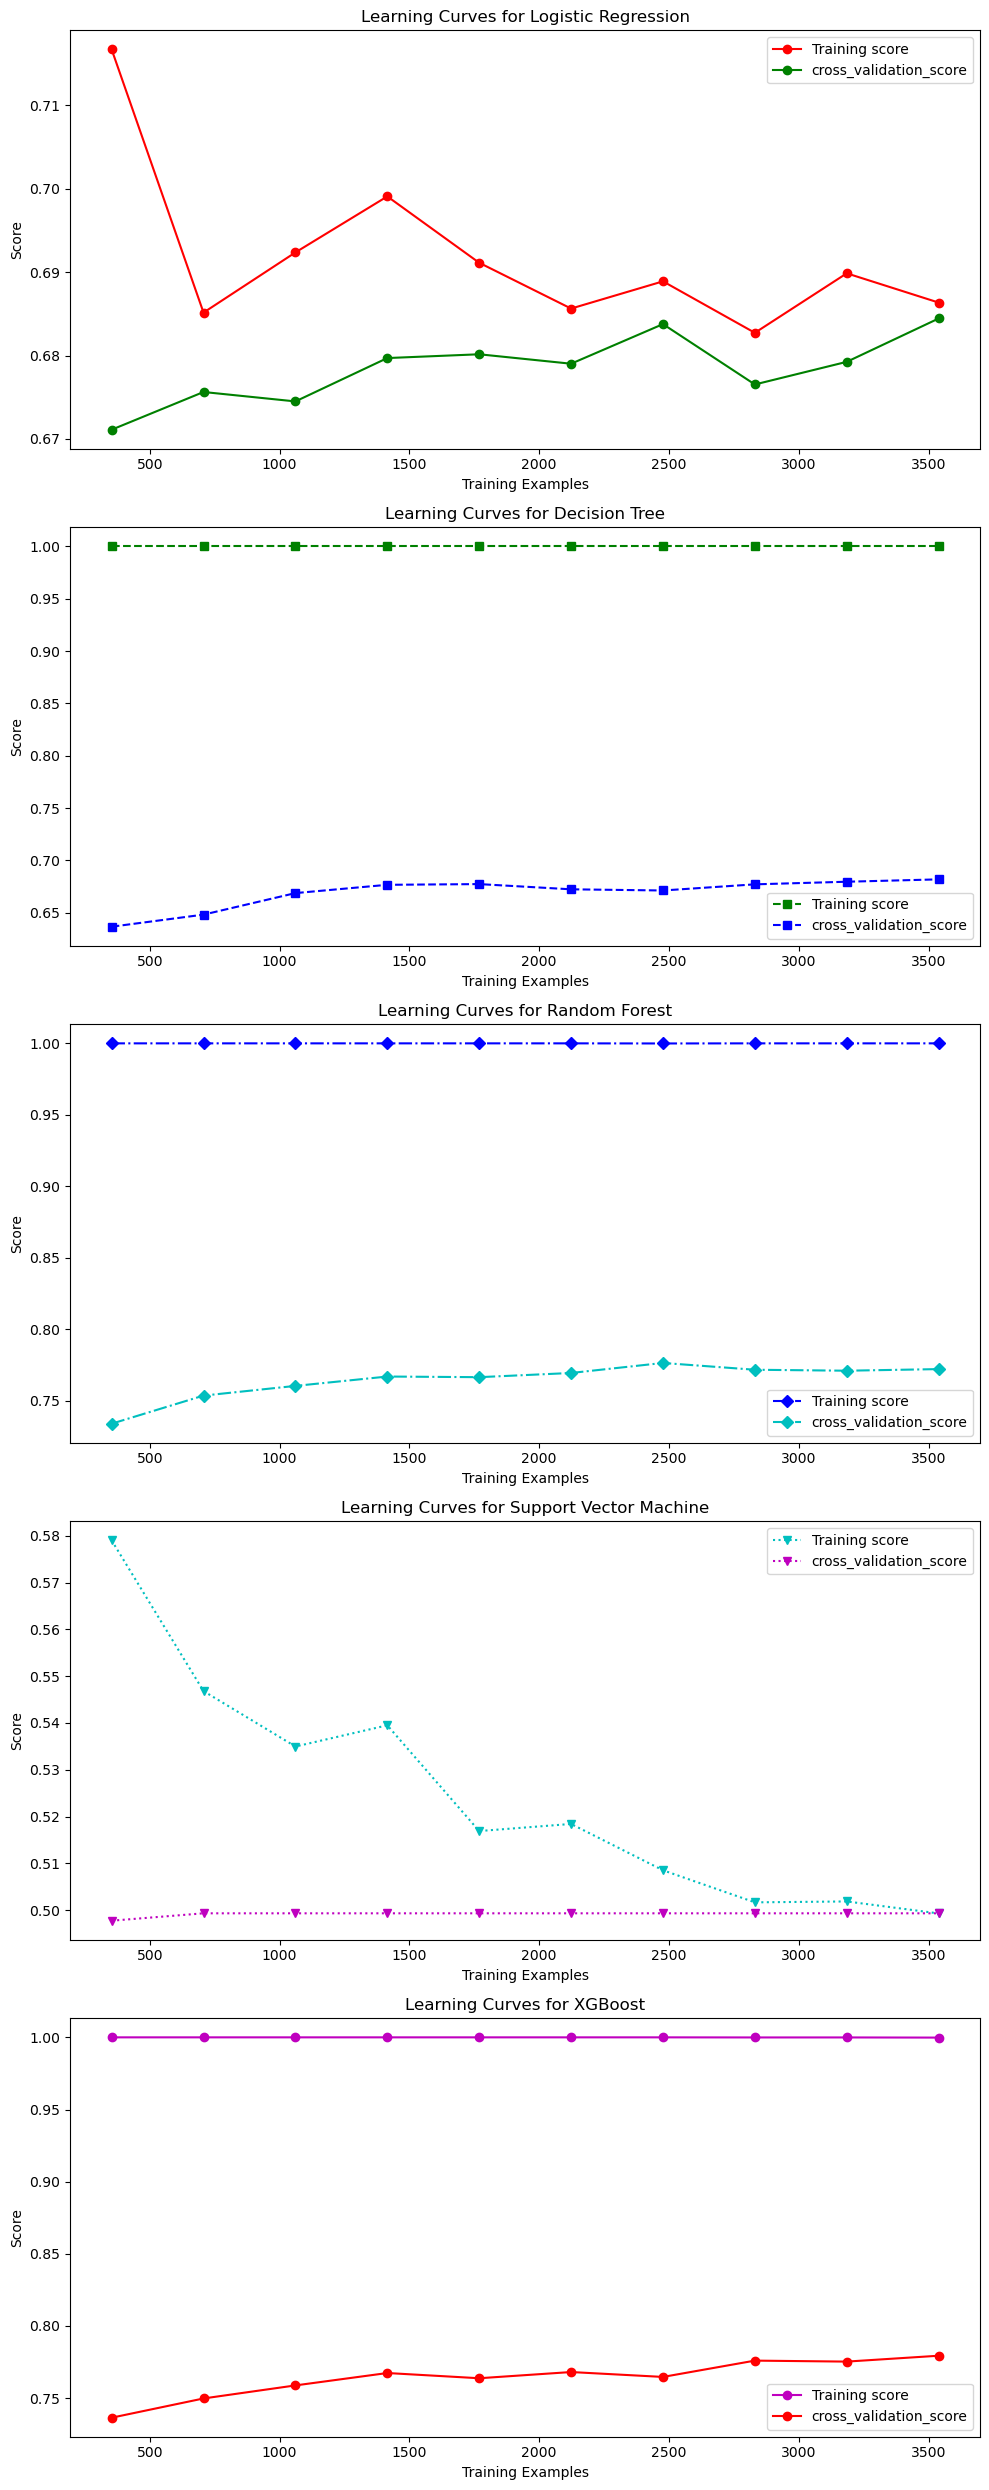

In [45]:
cv.learningCurve()

## apply cross validation to deep learning models

In [46]:
def tf_model():
    model = models.Sequential([layers.InputLayer(input_shape=(X.shape[1],)),
                              layers.Dense(64,activation='relu'),
                              layers.Dropout(0.3),
                              layers.Dense(32,activation='relu'),
                              layers.Dropout(0.3),
                              layers.Dense(8,activation='relu'),
                              layers.Dropout(0.3),
                              layers.Dense(3,activation='softmax')
                              ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

INFO:tensorflow:Assets written to: ram://cfed9fa3-7e0b-466c-82d8-76434797b6c5/assets
INFO:tensorflow:Assets written to: ram://0fd2a5a5-b2ae-4cb7-a51a-6c061f56f244/assets
INFO:tensorflow:Assets written to: ram://084d783a-6ae7-4375-a227-a6ae2940628a/assets
INFO:tensorflow:Assets written to: ram://85f59aa1-e0de-4d7f-add0-37ac711f1db2/assets
INFO:tensorflow:Assets written to: ram://bff27021-8a4b-4645-ae67-81c53625fe66/assets


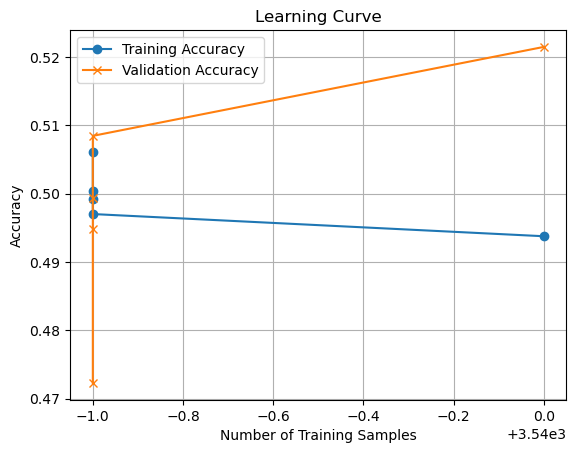

In [62]:
# apply cross validation to tensorflow

val_accuracies=[]
train_accuracies=[]
num_training_samples = []
def tf_cross_validation(model):
    kf_tf = KFold(n_splits=5, shuffle=True,random_state=42)
    for train_index,val_index in kf_tf.split(X,y):
        X_train,X_val=X.iloc[train_index],X.iloc[val_index]
        y_train,y_val = y[train_index],y[val_index]
        model = tf_model()
        histoy=model.fit(X_train,y_train,epochs=50,batch_size=5,verbose=0)
        with open('Tensorflow.pk1','wb') as file:
            pk.dump(model,file)
        val_loss,val_accuracy = model.evaluate(X_val,y_val,verbose=0)
        train_loss,train_accuracy = model.evaluate(X_train,y_train,verbose=0)
        
        val_accuracies.append(val_accuracy)
        train_accuracies.append(train_accuracy)
        
        num_training_samples.append(len(train_index))
    plt.plot(num_training_samples, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(num_training_samples, val_accuracies, label='Validation Accuracy', marker='x')
    
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()



    

In [63]:
print(f'the accuracy is: {np.mean(val_accuracies)}')

the accuracy is: 0.49932689070701597
